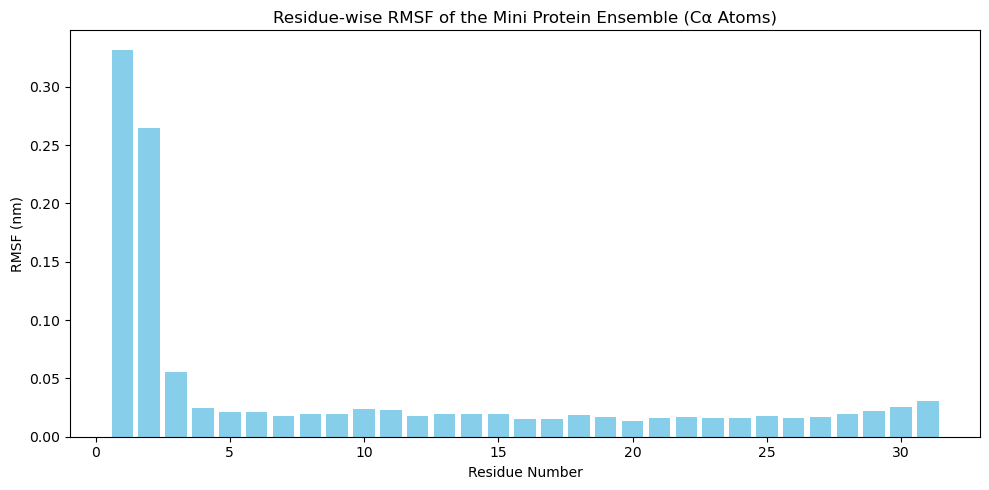

In [2]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import glob

file_list = glob.glob('/home/ndv3235/comp-lab-class-2024/Week7-Alphafold/Part 3_Colabfold_1V1D/AF2 Result/1V1D_AF2_5c7bb_unrelaxed_rank_*_alphafold2_ptm_model_*_seed_*.pdb')

if not file_list:
    raise FileNotFoundError("No PDB files found with the specified pattern.")

traj = md.load(file_list)

traj.superpose(traj[0])

ca_indices = traj.topology.select('name CA')

rmsf = md.rmsf(traj, traj[0], atom_indices=ca_indices)

residue_ids = [traj.topology.atom(i).residue.resSeq for i in ca_indices]

plt.figure(figsize=(10, 5))
plt.bar(residue_ids, rmsf, color='skyblue')
plt.xlabel('Residue Number')
plt.ylabel('RMSF (nm)')
plt.title('Residue-wise RMSF of the Mini Protein Ensemble (Cα Atoms)')
plt.tight_layout()
plt.show()


In [ ]:
Analyis :

High RMSF Values at Residues 0-2:

The residues 0, 1, and 2 show the highest RMSF values, indicating they are quite flexible.
This area corresponds to the N-terminus, which is usually more flexible or disordered.
Low RMSF Values from Residues 3-30:

Starting from residue 3, the RMSF values are generally low, mostly under 0.025 nm.
This suggests that these parts of the protein are stable and consistent across different structures.
Slight Increase Near Residue 30:

There’s a small rise in RMSF near residue 30, hinting at some flexibility at the C-terminus.
Functional Implications
The high RMSF at the beginning (residues 0-2) suggests this region may be important for potential ligand binding or interactions due to its flexibility.
Meanwhile, the low RMSF throughout most of the protein indicates that the core structure is stable and reliable.